# Computational Drug Discovery [Part 2]

 Exploratory Data Analysis**

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.


## **Install conda and rdkit**

In [1]:
# ! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
# ! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
# ! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
# ! conda install -c rdkit rdkit -y
import sys
import pandas as pd
sys.path.append('/usr/local/lib/python3.7/site-packages/')

rdkit is a cheminformatics library that is used to perform various tasks in computational chemistry. It is used to perform tasks such as descriptor calculation, molecular visualization, and molecular similarity calculations.

## **Load bioactivity data**

In [2]:
df = pd.read_csv('Data/03_bioactivity_data_curated.csv')
df.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,26.0,active
1,CHEMBL3775317,Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@@H](O)C...,4.0,active
2,CHEMBL3798663,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCO)c3...,2.5,active


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  121 non-null    object 
 1   canonical_smiles    121 non-null    object 
 2   standard_value      121 non-null    float64
 3   class               121 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.9+ KB


In [4]:
df_clean_smiles = df.copy()
df_clean_smiles['canonical_smiles'] = df_clean_smiles['canonical_smiles'].str.split('.').apply(lambda x: max(x, key=len))
df_clean_smiles

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,26.00,active
1,CHEMBL3775317,Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@@H](O)C...,4.00,active
2,CHEMBL3798663,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCO)c3...,2.50,active
3,CHEMBL3798944,CC(C)(O)Cn1cc(-c2ccc(-c3cncc(Cl)c3N3CCC4(CCNC4...,1.40,active
4,CHEMBL3798318,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCN4CC...,20.60,active
...,...,...,...,...
116,CHEMBL4849842,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CCCNC4=O)CC3...,3.00,active
117,CHEMBL4878356,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC4=O)c...,6.00,active
118,CHEMBL4862777,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC(=O)O...,6.00,active
119,CHEMBL4853002,CCOC(=O)/C=C/c1ccncc1-c1ccc2cc[nH]c2c1,45.74,active


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [5]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [6]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [7]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,319.368,2.4000,2.0,4.0
1,401.470,2.7610,2.0,5.0
2,451.958,3.3643,2.0,6.0
3,480.012,4.1429,2.0,6.0
4,505.066,4.4678,1.0,6.0
...,...,...,...,...
116,414.513,3.6132,2.0,5.0
117,386.459,2.8330,2.0,5.0
118,402.458,3.1954,2.0,6.0
119,292.338,3.8062,1.0,3.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [8]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,319.368,2.4000,2.0,4.0
1,401.470,2.7610,2.0,5.0
2,451.958,3.3643,2.0,6.0
3,480.012,4.1429,2.0,6.0
4,505.066,4.4678,1.0,6.0
...,...,...,...,...
116,414.513,3.6132,2.0,5.0
117,386.459,2.8330,2.0,5.0
118,402.458,3.1954,2.0,6.0
119,292.338,3.8062,1.0,3.0


In [9]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,26.00,active
1,CHEMBL3775317,Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@@H](O)C...,4.00,active
2,CHEMBL3798663,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCO)c3...,2.50,active
3,CHEMBL3798944,CC(C)(O)Cn1cc(-c2ccc(-c3cncc(Cl)c3N3CCC4(CCNC4...,1.40,active
4,CHEMBL3798318,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCN4CC...,20.60,active
...,...,...,...,...
116,CHEMBL4849842,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CCCNC4=O)CC3...,3.00,active
117,CHEMBL4878356,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC4=O)c...,6.00,active
118,CHEMBL4862777,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC(=O)O...,6.00,active
119,CHEMBL4853002,CCOC(=O)/C=C/c1ccncc1-c1ccc2cc[nH]c2c1,45.74,active


Now, let's combine the 2 DataFrame

In [10]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [11]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,26.00,active,319.368,2.4000,2.0,4.0
1,CHEMBL3775317,Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@@H](O)C...,4.00,active,401.470,2.7610,2.0,5.0
2,CHEMBL3798663,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCO)c3...,2.50,active,451.958,3.3643,2.0,6.0
3,CHEMBL3798944,CC(C)(O)Cn1cc(-c2ccc(-c3cncc(Cl)c3N3CCC4(CCNC4...,1.40,active,480.012,4.1429,2.0,6.0
4,CHEMBL3798318,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCN4CC...,20.60,active,505.066,4.4678,1.0,6.0
...,...,...,...,...,...,...,...,...
116,CHEMBL4849842,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CCCNC4=O)CC3...,3.00,active,414.513,3.6132,2.0,5.0
117,CHEMBL4878356,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC4=O)c...,6.00,active,386.459,2.8330,2.0,5.0
118,CHEMBL4862777,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC(=O)O...,6.00,active,402.458,3.1954,2.0,6.0
119,CHEMBL4853002,CCOC(=O)/C=C/c1ccncc1-c1ccc2cc[nH]c2c1,45.74,active,292.338,3.8062,1.0,3.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [12]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [13]:
df_combined.standard_value.describe()

count      121.000000
mean       447.793058
std       3067.824212
min          0.360000
25%          2.100000
50%          6.600000
75%         25.000000
max      30000.000000
Name: standard_value, dtype: float64

In [14]:
-np.log10( (10**-9)* 100000000 )

1.0

In [15]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [16]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [17]:
df_norm = norm_value(df_combined)
df_norm

/tmp/ipykernel_21225/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,active,319.368,2.4000,2.0,4.0,26.00
1,CHEMBL3775317,Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@@H](O)C...,active,401.470,2.7610,2.0,5.0,4.00
2,CHEMBL3798663,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCO)c3...,active,451.958,3.3643,2.0,6.0,2.50
3,CHEMBL3798944,CC(C)(O)Cn1cc(-c2ccc(-c3cncc(Cl)c3N3CCC4(CCNC4...,active,480.012,4.1429,2.0,6.0,1.40
4,CHEMBL3798318,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCN4CC...,active,505.066,4.4678,1.0,6.0,20.60
...,...,...,...,...,...,...,...,...
116,CHEMBL4849842,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CCCNC4=O)CC3...,active,414.513,3.6132,2.0,5.0,3.00
117,CHEMBL4878356,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC4=O)c...,active,386.459,2.8330,2.0,5.0,6.00
118,CHEMBL4862777,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC(=O)O...,active,402.458,3.1954,2.0,6.0,6.00
119,CHEMBL4853002,CCOC(=O)/C=C/c1ccncc1-c1ccc2cc[nH]c2c1,active,292.338,3.8062,1.0,3.0,45.74


In [18]:
df_norm.standard_value_norm.describe()

count      121.000000
mean       447.793058
std       3067.824212
min          0.360000
25%          2.100000
50%          6.600000
75%         25.000000
max      30000.000000
Name: standard_value_norm, dtype: float64

In [19]:
df_final = pIC50(df_norm)
df_final

/tmp/ipykernel_21225/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,active,319.368,2.4000,2.0,4.0,7.585027
1,CHEMBL3775317,Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@@H](O)C...,active,401.470,2.7610,2.0,5.0,8.397940
2,CHEMBL3798663,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCO)c3...,active,451.958,3.3643,2.0,6.0,8.602060
3,CHEMBL3798944,CC(C)(O)Cn1cc(-c2ccc(-c3cncc(Cl)c3N3CCC4(CCNC4...,active,480.012,4.1429,2.0,6.0,8.853872
4,CHEMBL3798318,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCN4CC...,active,505.066,4.4678,1.0,6.0,7.686133
...,...,...,...,...,...,...,...,...
116,CHEMBL4849842,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CCCNC4=O)CC3...,active,414.513,3.6132,2.0,5.0,8.522879
117,CHEMBL4878356,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC4=O)c...,active,386.459,2.8330,2.0,5.0,8.221849
118,CHEMBL4862777,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC(=O)O...,active,402.458,3.1954,2.0,6.0,8.221849
119,CHEMBL4853002,CCOC(=O)/C=C/c1ccncc1-c1ccc2cc[nH]c2c1,active,292.338,3.8062,1.0,3.0,7.339704


In [20]:
df_final.pIC50.describe()

count    121.000000
mean       8.009916
std        0.883712
min        4.522879
25%        7.602060
50%        8.180456
75%        8.677781
max        9.443697
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [21]:
df_final.to_csv('Data/04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [22]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,active,319.368,2.4000,2.0,4.0,7.585027
1,CHEMBL3775317,Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC[C@@H](O)C...,active,401.470,2.7610,2.0,5.0,8.397940
2,CHEMBL3798663,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCO)c3...,active,451.958,3.3643,2.0,6.0,8.602060
3,CHEMBL3798944,CC(C)(O)Cn1cc(-c2ccc(-c3cncc(Cl)c3N3CCC4(CCNC4...,active,480.012,4.1429,2.0,6.0,8.853872
4,CHEMBL3798318,O=C1NCCC12CCN(c1c(Cl)cncc1-c1ccc(-c3cnn(CCN4CC...,active,505.066,4.4678,1.0,6.0,7.686133
...,...,...,...,...,...,...,...,...
116,CHEMBL4849842,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CCCNC4=O)CC3...,active,414.513,3.6132,2.0,5.0,8.522879
117,CHEMBL4878356,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC4=O)c...,active,386.459,2.8330,2.0,5.0,8.221849
118,CHEMBL4862777,Cn1ncc2cc(-c3cnc4[nH]ccc4c3N3CCC4(CC3)CNC(=O)O...,active,402.458,3.1954,2.0,6.0,8.221849
119,CHEMBL4853002,CCOC(=O)/C=C/c1ccncc1-c1ccc2cc[nH]c2c1,active,292.338,3.8062,1.0,3.0,7.339704


Let's write this to CSV file.

In [23]:
df_2class.to_csv('Data/05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [24]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

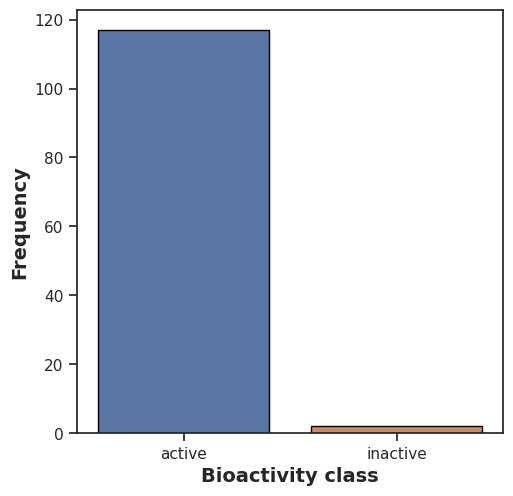

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

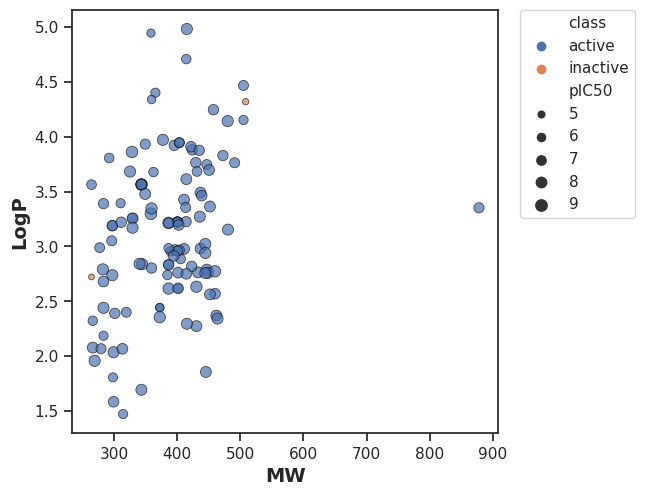

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

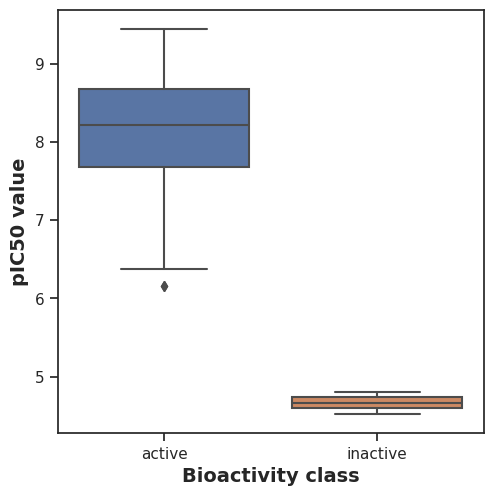

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [28]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [29]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,234.0,0.016018,0.05,Different distribution (reject H0)


#### **MW**

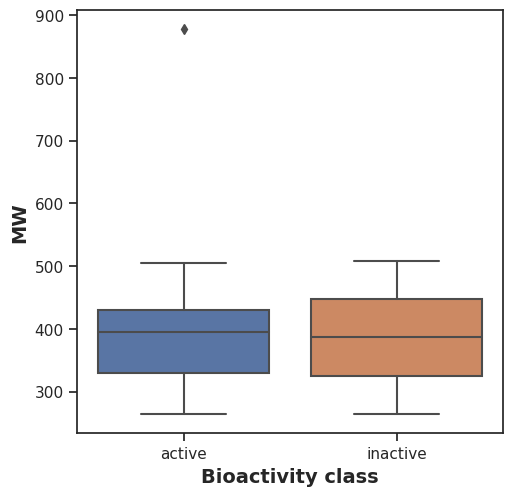

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [31]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,118.0,0.991753,0.05,Same distribution (fail to reject H0)


#### **LogP**

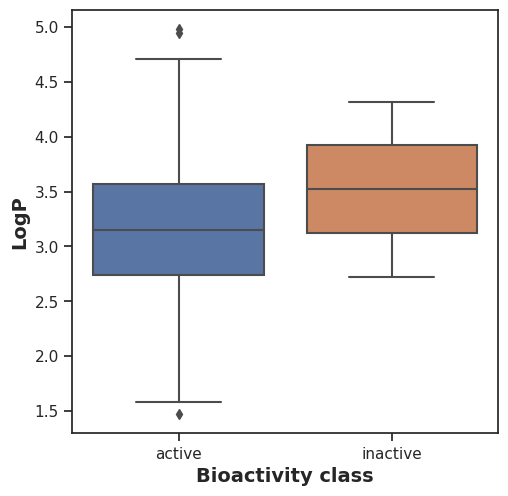

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [33]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,94.0,0.641827,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

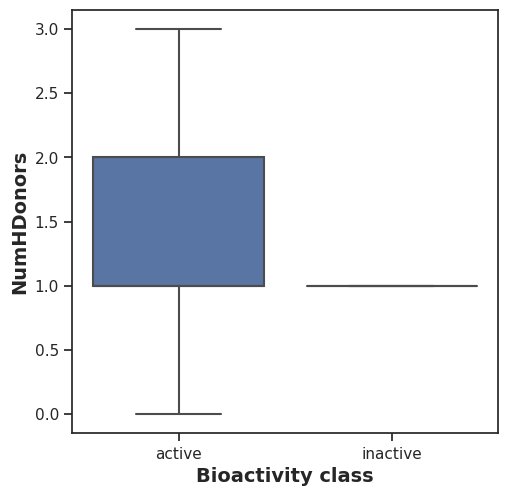

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [35]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,165.0,0.274458,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

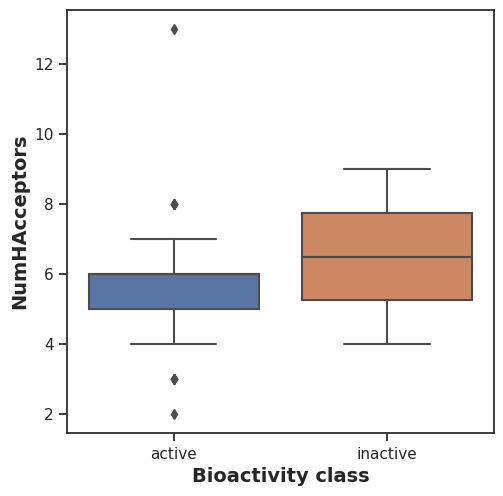

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [37]:
# save  mannwhitney('NumHAcceptors') in Data folder
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,106.0,0.82127,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [38]:
! zip -r EDA_results.zip . -i *.csv *.pdf *.png
! rm *.csv *.pdf *.png
! mv EDA_results.zip Data/

  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 14%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW.pdf (deflated 37%)
rm: cannot remove '*.png': No such file or directory
